In [1]:
import dataset
import pca_helper
import silscore
import numpy as np

In [2]:
dataset_generator_simon = dataset.DatasetGenerator(alg='simon_32_64')
simon_nr8 = dataset_generator_simon.gen_real_dataset((0x0, 0x0080), 8, 100000)


In [3]:
dataset = np.array(simon_nr8)
dataset.shape

(100000, 64)

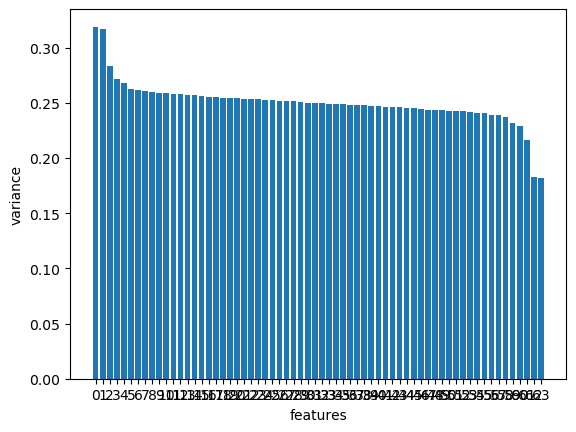

In [4]:
eigen_value, eigen_vector = pca_helper.EigenValueDecomposition(dataset=dataset)

In [10]:
eigen_value

array([0.01994072, 0.01983051, 0.01771754, 0.01698908, 0.01680378,
       0.01645833, 0.01636873, 0.01630089, 0.01623153, 0.01618925,
       0.01615362, 0.01610061, 0.01609766, 0.01606193, 0.0160362 ,
       0.01598588, 0.01595972, 0.0159526 , 0.01591667, 0.01588824,
       0.01585576, 0.01585033, 0.01582708, 0.01581638, 0.01576462,
       0.01576226, 0.01574959, 0.0157343 , 0.01569119, 0.01566852,
       0.01566014, 0.01562792, 0.01561366, 0.01556834, 0.01556646,
       0.01554765, 0.01553826, 0.01550684, 0.01548133, 0.01545504,
       0.01545025, 0.01542561, 0.01541332, 0.01539029, 0.01536769,
       0.01531944, 0.01531244, 0.01527025, 0.01523786, 0.01522371,
       0.01518829, 0.01515875, 0.01510868, 0.01508074, 0.01506855,
       0.01499698, 0.01496165, 0.01490607, 0.01479508, 0.01447358,
       0.01428166, 0.01352312, 0.01144084, 0.011336  ])

In [91]:
pca_results = pca_helper.DimensionReduction(dataset, n_components=3)

In [92]:
pca_results.shape

(100000, 3)

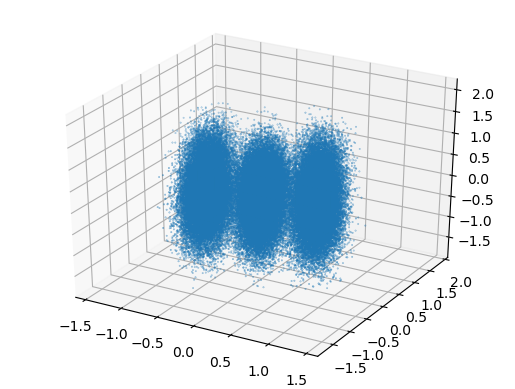

array([[-0.18591572,  0.70266747,  0.17292974],
       [ 0.39059079, -0.00325912, -0.61793466],
       [ 0.48815056,  0.65291947,  0.23901852],
       ...,
       [ 0.01662496, -0.25183166, -0.63768634],
       [ 0.89982683,  0.05304685, -0.47418139],
       [-0.34669075, -0.53991517, -0.24397395]])

In [7]:
pca_helper.Visualize3D(dataset=dataset)

In [5]:
lambda_base = 1/64
print(lambda_base)

0.015625


In [8]:
sum(eigen_value - lambda_base > 0.002)

3

In [12]:
eigen_vector.shape

(64, 64)

In [17]:
rs_eigen_vector = eigen_vector[:8].reshape((16,32))

In [18]:
print(rs_eigen_vector)

[[-8.02027982e-03 -2.56833379e-03  3.22390496e-03 -8.81168906e-03
   3.92929159e-03 -1.02375626e-03 -4.41632501e-03  7.08725177e-03
   8.55306591e-03  4.72583488e-03  3.74788626e-03  4.89144787e-03
   5.47116594e-03 -6.71551679e-03 -7.06211183e-01 -1.21102299e-02
  -3.35741284e-03  2.44075553e-03  9.72128202e-03  3.77891513e-03
   4.48586731e-03  3.62081713e-03  8.33233120e-03 -1.68411585e-03
   7.52585899e-03  1.50034006e-03 -2.30540397e-03  1.15025032e-02
   5.87958843e-03  2.65626203e-03  5.59334049e-03 -9.82705295e-04]
 [ 9.43106926e-03 -4.34869201e-03 -6.03247231e-04 -1.54668473e-03
   1.26756705e-03  8.77451208e-03  1.12921772e-02  1.39553807e-02
   2.51831758e-03 -7.88428324e-03 -5.31208970e-03  4.63250088e-03
   6.89860115e-03 -7.80650386e-03  7.06189567e-01 -1.07056097e-02
  -2.68613651e-03  5.54922003e-03 -7.45076092e-03 -1.01830116e-02
   3.66067874e-03  7.24208845e-03 -1.63048958e-03 -4.11529270e-03
  -4.56577709e-03  1.03740005e-02  9.70352384e-03 -4.95783988e-04
  -7.0378

In [ ]:
def ExploreInputDifference(nr=5, data_size = 100000, t0=0.003, t1 = 0.7):
    

In [8]:
import dataset
import pca_helper
import silscore
import random
import math
import time

def generate_numbers_with_hamming_weight(bit_size = 32, hamming_weight = 1, number_pool=None):
    number = 0
    while number == 0:
        bit_position = random.sample(range(bit_size), hamming_weight)
        for position in bit_position:
            number |= (1 << position)
        if number_pool is not None:
            if number in number_pool:
                number = 0
            else:
                number_pool.append(number)
                return number
        else:
            return number

def calculate_combinations(m, n):
    return math.factorial(m) // (math.factorial(n) * math.factorial(m - n))

def explore_input_difference(blocksize=32, wordsize=16, nr=5, datasize=100000, hamming_weight=1, t0=0.003, num_PCs=3, savepath=None):
    numbers = []
    lambda_base = 1/(2*blocksize)
    dataset_generator_speck = dataset.DatasetGenerator(alg='speck_32_64')
    num_cases = calculate_combinations(blocksize, hamming_weight)
    while len(numbers) < num_cases:
        number = generate_numbers_with_hamming_weight(blocksize, hamming_weight, numbers)
        left_word = (number >> wordsize) & 0xFFFF
        right_word = number & 0xFFFF
        diff = (left_word, right_word)
        
        data_speck = dataset_generator_speck.gen_dataset(diff, nr, datasize)
        eigen_value, eigen_vector = pca_helper.EigenValueDecomposition(dataset=data_speck)
        if sum(eigen_value - lambda_base > t0) > num_PCs:
            pca_results = pca_helper.DimensionReduction(data_speck, n_components=3)
            start_time = time.time()
            score = silscore.calculate_silhouette(pca_results, 27, 3)
            end_time = time.time()
            elapsed_time = end_time - start_time
            if savepath is not None:
                with open(savepath, "w") as file:
                    file.write(f'diff = {diff}, silhouette score: {score}, elapsed time: {elapsed_time} sec')
            else:
                print(f'diff = {diff}, silhouette score: {score}, elapsed time: {elapsed_time} sec')
        # else:
        #     # print(f'there are no significant components')
        #     pass


    

In [9]:
explore_input_difference(blocksize=32, wordsize=16, nr=5, datasize=100000, hamming_weight=1, t0=0.003, num_PCs=3, savepath="./explore_results/speck_32_64_nr5_hw_1.txt")

In [1]:
# blocksize = 32
# for hamming_weight in range(1,blocksize+1):
#     print("hamming weight = " + str(hamming_weight))
#     numbers = []
#     num_cases = calculate_combinations(blocksize, hamming_weight)
#     while len(numbers) < num_cases:
#         number = generate_numbers_with_hamming_weight(blocksize, hamming_weight, numbers)
        
        
#     # print('numbers = ')
#     # for num in numbers:
#     #     print(format(num, '04X'))


    

hamming weight = 1


NameError: name 'calculate_combinations' is not defined

In [1]:
import pickle

# 파일을 읽어서 데이터를 로드합니다.
with open('./freshly_trained_nets/histsimon_32_64_8_00000001_r_depth10.p', 'rb') as file:
    histogram_data = pickle.load(file)

In [2]:
histogram_data

{'loss': [0.21260367333889008,
  0.192860946059227,
  0.18331769108772278,
  0.16901370882987976,
  0.16168391704559326,
  0.15730835497379303,
  0.15439674258232117,
  0.15218254923820496,
  0.15013006329536438,
  0.14847533404827118,
  0.1541624516248703,
  0.1515308916568756,
  0.14867578446865082,
  0.14590837061405182,
  0.1441914439201355,
  0.14297814667224884,
  0.141862154006958,
  0.14078585803508759,
  0.13970665633678436,
  0.1386912316083908,
  0.14456702768802643,
  0.1438591629266739,
  0.14324979484081268,
  0.14244240522384644,
  0.14154979586601257,
  0.14074845612049103,
  0.13995666801929474,
  0.13910046219825745,
  0.13818594813346863,
  0.13732275366783142,
  0.14276525378227234,
  0.14219999313354492,
  0.1401844620704651,
  0.13818317651748657,
  0.137457937002182,
  0.1367918699979782,
  0.13606691360473633,
  0.135349303483963,
  0.13461516797542572,
  0.13389430940151215,
  0.13903096318244934,
  0.13842099905014038,
  0.1379750669002533,
  0.137456774711608